# Ultility and Preparation

In [1]:
# !pip install kaggle
# !pip install kagglehub
# !pip install pandas
# !pip install matplotlib
# !pip install pytorch
# !pip install torchvision

In [2]:
import os
import random
import matplotlib.pyplot as plt
import torch

In [3]:
from src.dataset import SeaTurtleDataset, download_dataset

## Download the dataset

In [4]:
paths = download_dataset()
display(paths)

Dataset downloaded and extracted to: /Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4


{'path': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4',
 'images_path': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data',
 'annotations_path': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data/annotations.json',
 'metadata': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data/metadata.csv',
 'metadata_splits': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data/metadata_splits.csv'}

## Reduce Dataset size while implement models

In [5]:
DATA_DIR = './data/seaturtleid2022-subset'

annotations_path= f"{DATA_DIR}/annotations.json"
img_dir=paths['images_path']

train_csv_path = os.path.join(DATA_DIR, "metadata_closed_set_splits_train.csv")
eval_csv_path = os.path.join(DATA_DIR, "metadata_closed_set_splits_valid.csv")
test_csv_path = os.path.join(DATA_DIR, "metadata_closed_set_splits_test.csv")

train_dataset = SeaTurtleDataset(
    metadata_path=train_csv_path, 
    img_dir=img_dir, annotations_path=annotations_path)
eval_dataset = SeaTurtleDataset(
    metadata_path=eval_csv_path, 
    img_dir=img_dir, annotations_path=annotations_path)
test_dataset = SeaTurtleDataset(
    metadata_path=test_csv_path, 
    img_dir=img_dir, annotations_path=annotations_path)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [6]:
item = train_dataset[1]
item

{'image_id': np.int64(449),
 'img_path': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data/images/t023/CMTutQfpan.JPG',
 'label': np.int64(0),
 'identity': 't023',
 'image_arr': array([[[57, 98, 80],
         [57, 98, 80],
         [58, 99, 81],
         ...,
         [54, 87, 68],
         [53, 86, 67],
         [52, 85, 66]],
 
        [[56, 97, 79],
         [56, 97, 79],
         [57, 98, 80],
         ...,
         [54, 87, 68],
         [54, 87, 68],
         [52, 85, 66]],
 
        [[55, 96, 78],
         [56, 97, 79],
         [56, 97, 79],
         ...,
         [55, 88, 69],
         [54, 87, 68],
         [53, 86, 67]],
 
        ...,
 
        [[78, 91, 63],
         [78, 91, 63],
         [78, 91, 63],
         ...,
         [60, 70, 45],
         [59, 69, 44],
         [59, 69, 44]],
 
        [[78, 91, 63],
         [78, 91, 63],
         [78, 91, 63],
         ...,
         [60, 70, 45],
         [59, 69, 44],
        

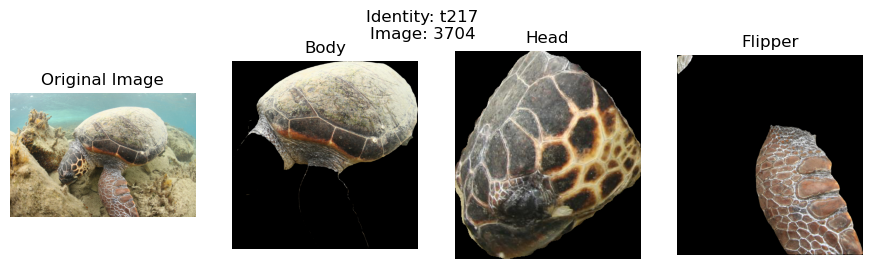

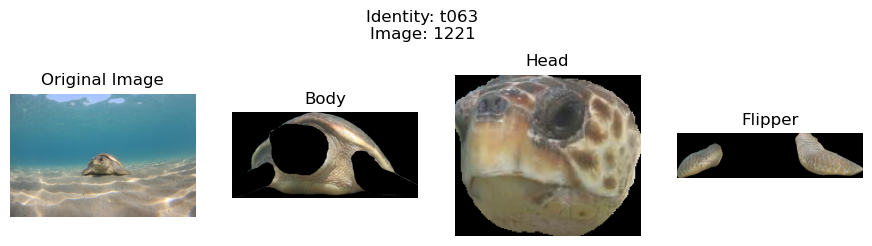

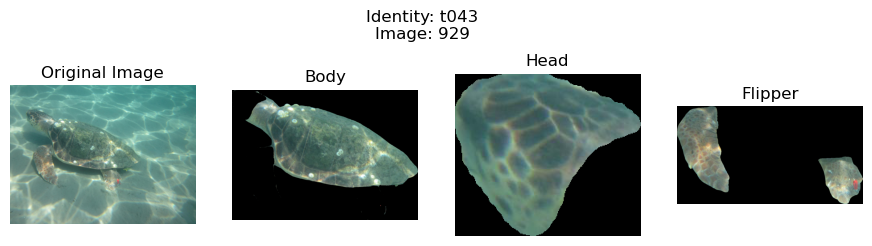

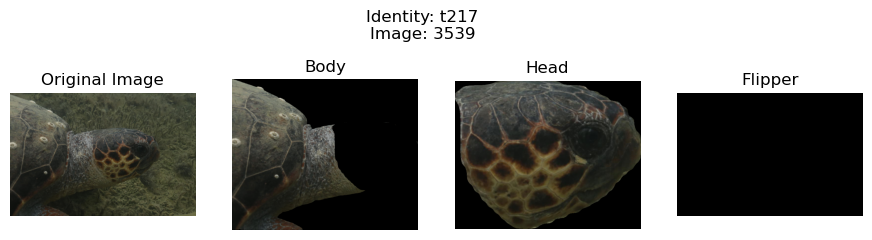

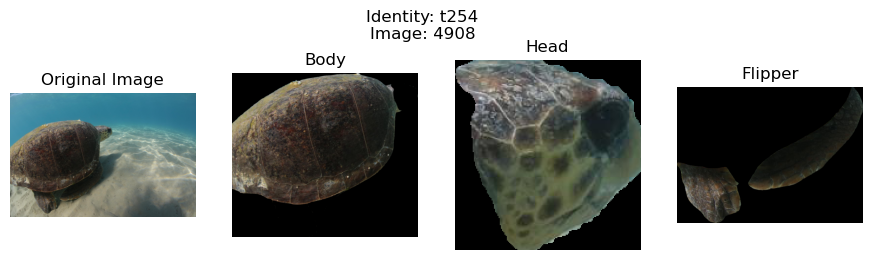

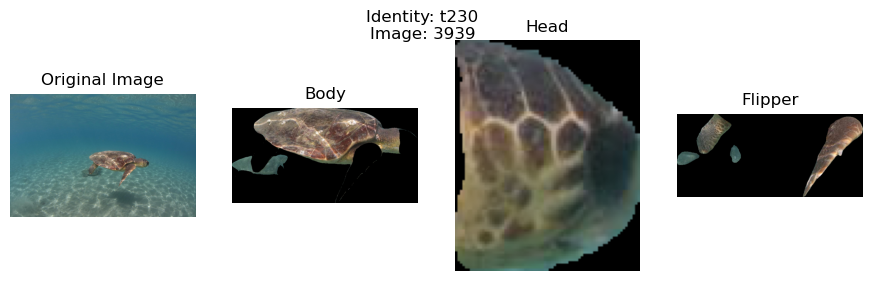

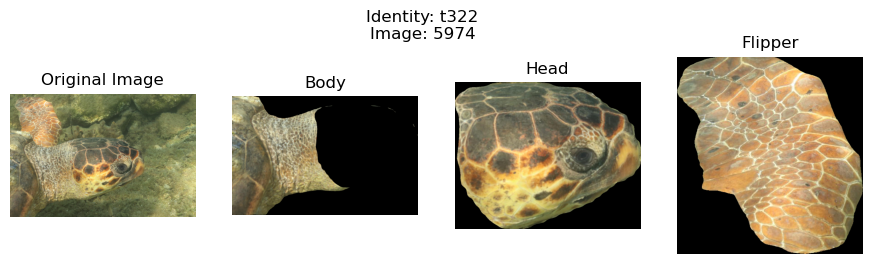

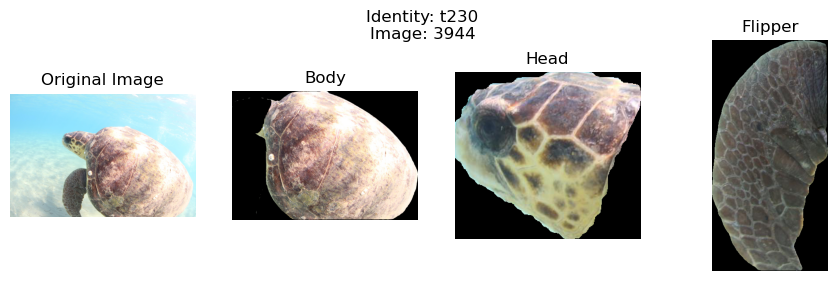

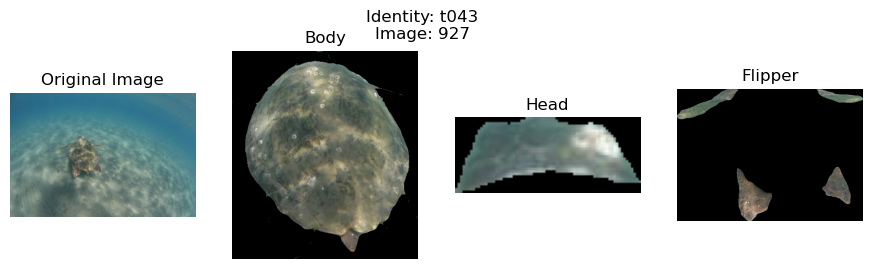

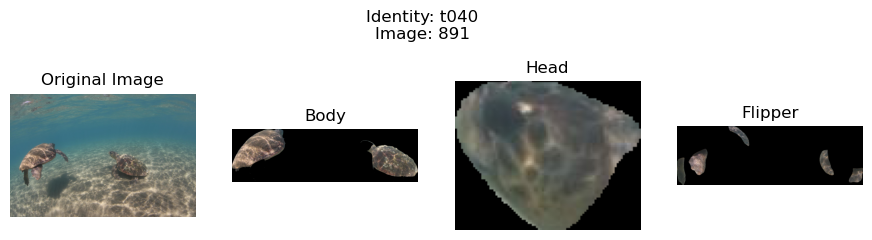

In [7]:
rows = 10
sample_idxes = random.sample(range(len(train_dataset)), rows)
# randomly sample 10 images from eval dataset and display them with their masks
for i in range(1, rows + 1):
    sample_idx = sample_idxes[i - 1]
    item = train_dataset[sample_idx]
    img, label, identity, image_id = item["image_arr"], item["label"], item["identity"], item["image_id"]
    
    fig, axs = plt.subplots(1, 4, figsize=(11, 3))
    fig.suptitle(f"Identity: {identity}\nImage: {image_id}")
    axs[0].imshow(img)
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(item["body_arr"])
    axs[1].set_title("Body")
    axs[1].axis("off")

    axs[2].imshow(item["head_arr"])
    axs[2].set_title("Head")
    axs[2].axis("off")

    axs[3].imshow(item["flipper_arr"])
    axs[3].set_title("Flipper")
    axs[3].axis("off")

plt.show()